In [23]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Load and preprocess data
df = pd.read_csv('../../data/archive/ST001937_AN003150.csv')
df = df.drop(['Sample ID', 'RAW_FILE_NAME'], axis=1)
#dropping the phenotype with for healthy SPNS
df = df[df['Phenotypes'] != 'Healthy Controls']

df['Phenotypes'] = df['Phenotypes'].apply(lambda x: 1 if x == 'Maligant SPNS' else 0)
df.value_counts('Phenotypes')

Phenotypes
1    723
0    157
dtype: int64

In [24]:
df = df.groupby('Phenotypes').apply(lambda x: x.sample(n=157)).reset_index(drop = True)

In [25]:
# Separate features and labels
X = df.drop('Phenotypes', axis=1)
y = df['Phenotypes']

In [26]:
from sklearn.model_selection import GridSearchCV
import numpy as np

from sklearn.svm import SVC

# Definisci il modello
model = SVC(kernel='rbf')

# Definisci la griglia dei parametri da esplorare
param_grid = {
    'C': np.logspace(0, 1, 60),
    'gamma': np.logspace(-4, -3, 60)
}

# Esegui la ricerca esaustiva dei parametri
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, n_jobs=-1, verbose=2, scoring='accuracy')
grid_search.fit(X, y)

# Stampa i migliori parametri trovati
print("Migliori parametri:")
print(grid_search.best_params_)
print(grid_search.best_score_)

Fitting 10 folds for each of 3600 candidates, totalling 36000 fits
[CV] END ...C=92.49147277217335, gamma=0.0007038135554931555; total time=   0.0s
[CV] END ...C=92.49147277217335, gamma=0.0007038135554931555; total time=   0.0s
[CV] END ...C=92.49147277217335, gamma=0.0007038135554931555; total time=   0.0s
[CV] END ...C=92.49147277217335, gamma=0.0007038135554931555; total time=   0.0s
[CV] END ...C=92.49147277217335, gamma=0.0007318242219076174; total time=   0.0s
[CV] END ...C=92.49147277217335, gamma=0.0007318242219076174; total time=   0.0s
[CV] END ....C=96.17248711152965, gamma=0.000103979841848149; total time=   0.0s
[CV] END ....C=96.17248711152965, gamma=0.000103979841848149; total time=   0.0s
[CV] END ....C=96.17248711152965, gamma=0.000103979841848149; total time=   0.0s
[CV] END ....C=96.17248711152965, gamma=0.000103979841848149; total time=   0.0s
[CV] END ..C=96.17248711152965, gamma=0.00010811807510766077; total time=   0.0s
[CV] END ..C=96.17248711152965, gamma=0.00

/tmp/ipykernel_27629/2377112131.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')
/tmp/ipykernel_27629/2377112131.py:6: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


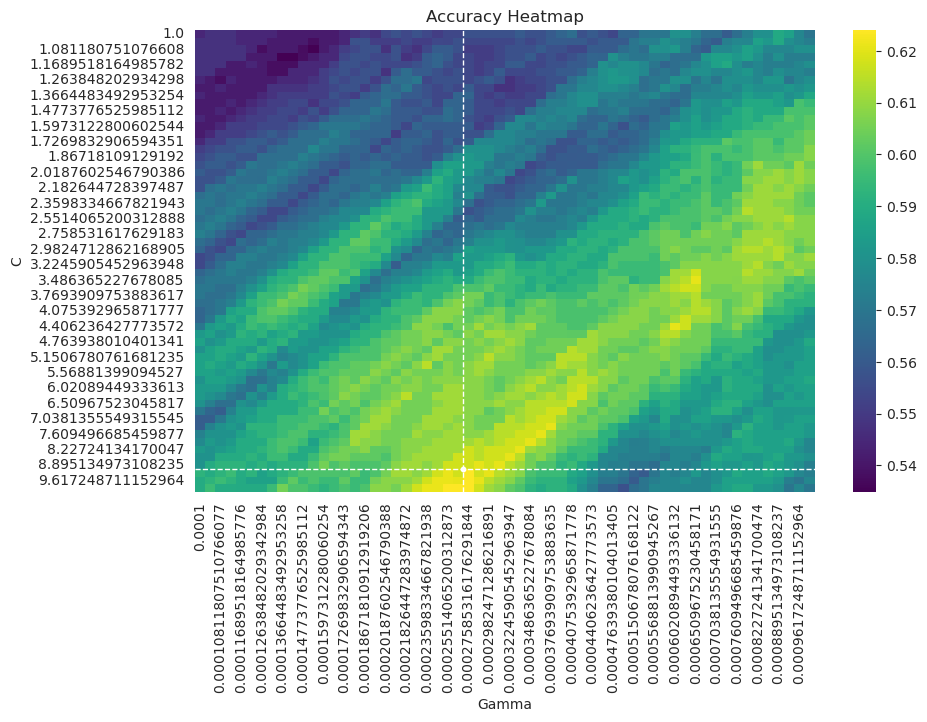

In [27]:
#visualize the results of the grid search in a heatmap

results = pd.DataFrame(grid_search.cv_results_)
results = results.sort_values(by='mean_test_score', ascending=False)
results = results.reset_index(drop=True)
results = results.pivot(index='param_C', columns='param_gamma', values='mean_test_score')


plt.figure(figsize=(10, 6))
sns.heatmap(results, cmap='viridis')
plt.xlabel('Gamma')
plt.ylabel('C')
#plt.xticks(ticks=np.arange(0, len(results.columns), 10), labels=[round(x, 2) for x in results.columns[::10]])
#plt.yticks(ticks=np.arange(0, len(results.index), 10), labels=[round(x, 2) for x in results.index[::10]])
plt.axhline(y=results.index.get_loc(grid_search.best_params_['C']), color='white', linestyle='dashed', linewidth=1)
plt.axvline(x=results.columns.get_loc(grid_search.best_params_['gamma']),color='white', linestyle='dashed', linewidth=1)
plt.scatter(results.columns.get_loc(grid_search.best_params_['gamma']), results.index.get_loc(grid_search.best_params_['C']), color='white', s=10)
plt.title('Accuracy Heatmap')
plt.show()

